# Introduction to K-Nearest Neighbors

## Introduction to the Dataset

In the previous lesson, we looked at the machine learning workflow and trained a simple classifier to predict if a patient has breast cancer. We learned how we can quickly prototype a machine learning model and experiment with it to get reasonable results.

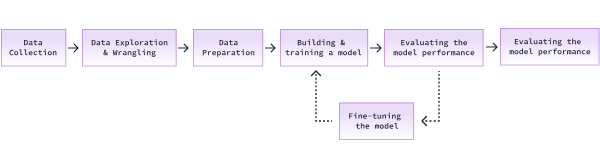

While there is a benefit to being able to quickly experiment and iterate, not understanding how the algorithm for a model actually works can impact the outcome of those random experiments.

In this lesson, we'll learn a different machine learning algorithm and implement it from scratch. We'll use it to build and train a classifier that can predict whether a bank customer will subscribe to a term deposit or not.

We'll use a modified version of the [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). It contains data on customers of a Portuguese banking institution that ran marketing campaigns to assess whether customers would subscribe to their product. The dataset consists of 21 columns, including the target variable:



- age: (numeric)
- job: type of job (categorical: 'admin','blue collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric).
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- y: has the client subscribed a term deposit? (binary: 'yes','no')

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [318]:
banking_df = pd.read_csv('../../Datasets/subscription_prediction.csv')
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Select the categorical features
banking_df.select_dtypes(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
2,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent,no
3,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,nonexistent,no
4,management,single,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
10117,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,nonexistent,no
10118,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes
10119,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
10120,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [4]:
# select numerical values
banking_df.select_dtypes(exclude='O')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,57,293,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,39,195,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
10117,64,151,3,999,0,-1.1,94.767,-50.8,1.028,4963.6
10118,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
10119,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
10120,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [5]:
banking_df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [6]:
banking_df.shape

(10122, 21)

In [7]:
# check misssing values
banking_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
banking_df['y'].value_counts()

y
no     5482
yes    4640
Name: count, dtype: int64

In [9]:
banking_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000
mean,40.313673,373.414049,2.369789,896.476882,0.297471,-0.432671,93.492407,-40.250573,3.035134,5138.838975
std,11.855014,353.277755,2.472392,302.175859,0.680535,1.714657,0.628615,5.271326,1.884191,85.859595
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,140.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-42.700000,1.252000,5076.200000
50%,38.000000,252.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,498.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## K-Nearest Neighbors (k-NN)

Upon exploring the data, we discovered that the dataset has:

- 10122 observations, 20 features, and 1 target variable.
- No missing values in the dataset.
- 5482 customers who didn't subscribe and 4640 who did.
- 10 categorical columns and 10 numeric columns, excluding the target column.

If we explore our dataset further, we could ask several questions to better analyze it. For example:

- How many customers under the age of 30 subscribed to the product?
- Were the customers who subscribed contacted more often than those who weren't during the marketing campaign?
- Which customers were contacted more often before this campaign?

We could potentially answer each of these questions ourselves and develop a complex set of rules that could tell us which customers are likely to subscribe given all the features available to us.



Let's look at a visual representation of the above. The following plot depicts customers who subscribed (purple) and those who didn't (blue). Our two axes correspond to two features. For example, one could be age and another campaign.

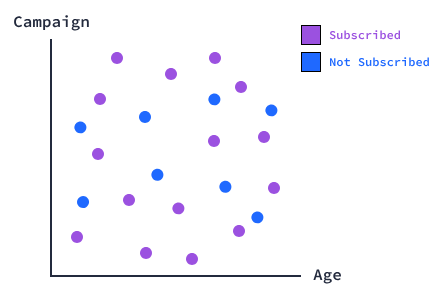

Each customer is a data point in a 2-dimensional feature space and is defined by two numerical values. If we know the age of a customer and how many times they were contacted during the campaign, we can locate that point in that space.

The proximity of those customers in the feature space can tell us how similar they are to one another in relation to their label. For example, let's say that 3 out of 5 customers who are 30 to 32 years old and were contacted 2 to 4 times during the campaign subscribed to the product. In the plot, the data points for those customers would be relatively close to one another. We could say that customers within that age and campaign range of values are more likely to subscribe to the bank's product.

That's the kind of rule we could develop through our analysis and by looking at the data points in the feature space.

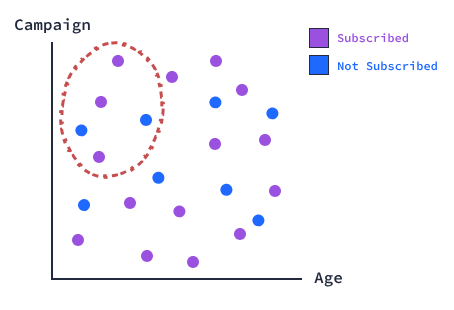

What if we add another customer (blue dot) to our feature space above?

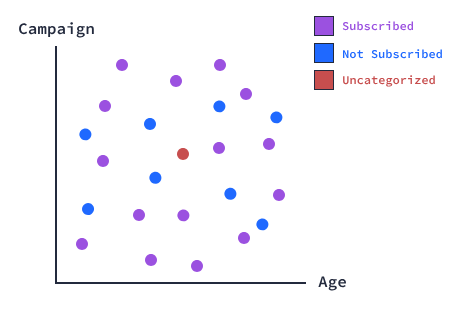

How can we predict if this new customer is going to subscribe, given just those two features?

With what we learned above, we can calculate the distance of that blue dot from all the other points and look at the ones closest to it. If a majority of the points closest to it are purple, we can classify the new point as purple. If they are blue, we can classify it as blue.

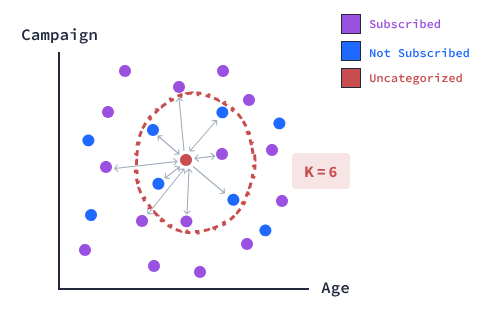

By looking at how closely-related those data points are in context of their labels, we are allowing those rules, like the ones we mentioned above, to develop on their own. This is the K-Nearest Neighbors algorithm.

1. For an unseen data point, the algorithm calculates the distance between that point and all the observations across all features in the training dataset.

2. It sorts those distances in ascending order.

3. It selects 
K
 observations with the smallest distances from the above step. These 
K
 observations are the K-nearest neighbors of that unseen data point.

Note that there should be at least 
K
≥
1
 observations in the dataset.

It calculates which labels of those neighbors is the most common, and assigns that label to the unseen data point.

Before we implement the algorithm, let's prepare our data.

## Data Preparation

When we explored our data, we noticed that our target column, y, stores the labels as yes or no strings. While those are reasonable categories and we can continue working with them as is, we'll encode those strings as the numbers 0 for no and 1 for yes.

In the previous lesson, we learned how to split the dataset into a training and test set. Instead of using scikit-learn's `train_test_split()` function, we'll implement the split ourselves. We'll opt for a `85-15%` split.

In order to split the dataset, we could take a direct approach of selecting the first N observations as the training set and the rest as the test set. But that poses a problem.  We don't know how many observations of those N have a label of 0 and how many have a label of 1.

Let's say N = 100. What if, out of those 100, only 5 observations had a label of 1?

When the dataset is imbalanced, a machine learning model might struggle to accurately predict the labels because it hasn't had enough information to learn to distinguish between the classes. Ideally, the model should have enough data corresponding to each class so it can learn from the data effectively.

Even though our dataset has a reasonably balanced class distribution, we need to make sure that both the train and test sets have a similar percentage of subscribed customers.

The data collection process can also introduce certain biases. It's possible that the clients were selected in a specific order. For example, the collection process could've added the newest clients first. If we were to select the first N observations, we could be introducing bias into our model. That's why, when creating our training and test sets, randomly selecting observations is important, as it can help reduce any such biases.

Fortunately for us, this isn't complicated to implement in pandas.

In [10]:
banking_df['y'] = banking_df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Randomize the sample
train_df = banking_df.sample(frac=0.85,random_state=417)
test_df = banking_df.drop(train_df.index)

In [11]:
banking_df['y'].value_counts(normalize=True) * 100

y
0    54.159257
1    45.840743
Name: proportion, dtype: float64

In [12]:
train_df['y'].value_counts(normalize=True) * 100

y
0    54.009763
1    45.990237
Name: proportion, dtype: float64

In [13]:
test_df['y'].value_counts(normalize=True) * 100

y
0    55.006588
1    44.993412
Name: proportion, dtype: float64

In [14]:
X_train = train_df.drop('y', axis=1)
X_test = test_df.drop('y', axis=1)
y_train = train_df['y']
y_test = test_df['y']

## k-NN for One Feature

Now that we have our training and test sets, we can implement our algorithm!

Before we begin, we need to select a `distance metric` to calculate the distance between observations.

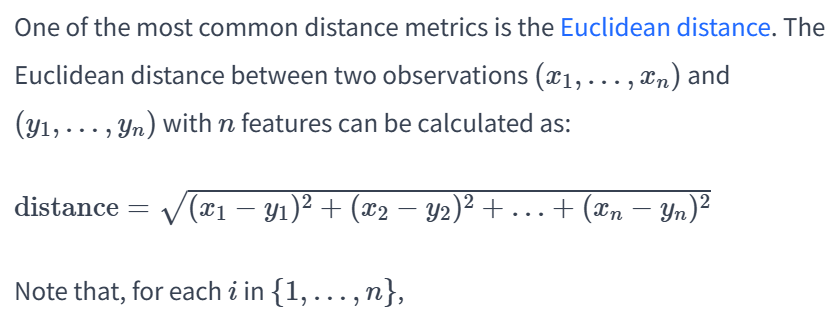s:

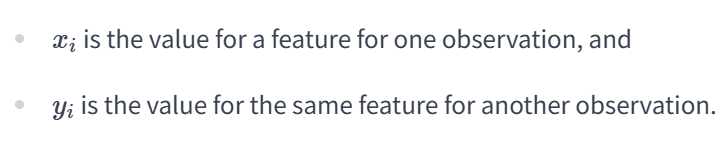

When we are working with only one feature, the above formula simplifies to:

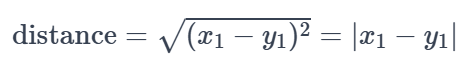

We'll implement our algorithm with this distance metric. You're encouraged to learn about some of the other distance metrics that can be used as well:

- [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)
- [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance)
- [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance)

As per the algorithm, we'll calculate how far an unseen observation is from all the observations in the training data for a specific feature.

But wait a minute. We learned that a machine learning model is trained over some data and then the trained model can be used to classify unseen data.

Why are we using an unseen observation to implement the k-NN algorithm? Aren't we training the model using unseen data?

K-nearest neighbors is a bit of a unique case. It works at the time of prediction and it doesn't technically have a "training phase." The model classifies every new input by comparing it to its neighbors. Those neighbors are from the training set.

As a result, the algorithm can be time-consuming depending on the number of observations and features in our dataset.

So why did we have to create a separate test set?

Even though there's no training phase, the algorithm does rely on an unseen observation to be able to make a prediction. In the next exercise, we'll use a random value from our test set to implement the algorithm.

In [113]:
def knn(feature, single_test_input, k):
    X_train['distance'] = abs(X_train[feature] - single_test_input[feature])
    prediction = y_train[X_train['distance'].nsmallest(n=k).index].mode()[0]
    return prediction

In [120]:
feature = 'age'
knn('age', X_test, k=3)

0

In [118]:
knn(feature, test, 3)

1

## Evaluating the Model

On the previous screen, we implemented the algorithm and used it to classify a sample input from the test set.

We'll now evaluate our model's performance by calculating how accurately it is able to correctly classify a given value. We can calculate the accuracy by comparing how many predictions the model gets correct compared to the total number of predictions.

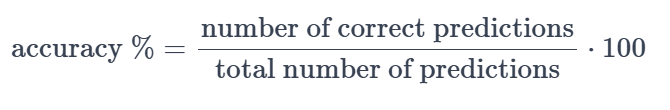

In order to do that, we'll classify every data point in our test set and compare the predictions to the actual labels for those data points.

In [128]:
X_test['age_predicted_y'] = X_test.apply(lambda x: knn('age', x, k=3), axis=1)

In [133]:
correct_preds = (X_test['age_predicted_y'] == y_test).sum()
total = X_test.shape[0]
accuracy = correct_preds / total
accuracy

0.538866930171278

In [138]:
model_accuracy = (X_test["age_predicted_y"] == y_test).value_counts(normalize=True)[True]*100
print(f"Accuracy of model trained on the column 'age': {model_accuracy:.2f}%")

Accuracy of model trained on the column 'age': 53.89%


In [136]:
# using the campgain feature

X_test['campaign_predicted_y'] = X_test.apply(lambda x: knn('campaign', x, k=3), axis=1)

model_accuracy = (X_test["campaign_predicted_y"] == y_test).value_counts(normalize=True)[True]*100
print(f"Accuracy of model trained on the column 'campaign': {model_accuracy:.2f}%")

Accuracy of model trained on the column 'campaign': 55.14%


In [137]:
(X_test["campaign_predicted_y"] == y_test).value_counts(normalize=True)

True     0.551383
False    0.448617
Name: proportion, dtype: float64

## Feature Engineering I

For a single feature, age, our model got an accuracy of ~54%! It's not performing too well.

Fortunately, we don't have to rely on using just one feature at a time. We can use multiple at the same time, which might improve our model's performance.

When building machine learning models, we'll often have to transform features so they can be effectively used to train models and yield better performance. The process of transforming those features is called feature engineering. Feature engineering will often be part of the data preparation step of the machine learning workflow.

We'll work through a couple of commonly used techniques in this lesson.

Both age and campaign are numerical features. There are several categorical variables in our data set as well. However, all the categorical variables in our data set contain string values.

We can't calculate the distance between two strings. That's another limitation of the k-nearest neighbor algorithm. We can work around it without much effort.

Just like we encoded the yes and no values as 0 and 1 for our target variable, we can encode our categorical features.

What values could we use for the categories in the marital column, for example? Maybe 1 to 4 for all 4 categories?

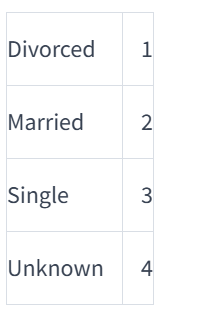

While that sounds like a good approach, it's not suitable in practice.

We're calculating the distance between the feature(s) of two observations. By assigning each category a unique number, we're inadvertently turning the feature into an ordinal variable. The distance between a 4 and a 1 is higher than that between a 1 and a 2, even though there is no inherent order or rank to those categories.

An alternative approach is to convert each category into its own column. For every observation in each column, we set a binary value, 0 or 1, for that observation, depending on how the observation was originally categorized.

This is what the outcome would look like:

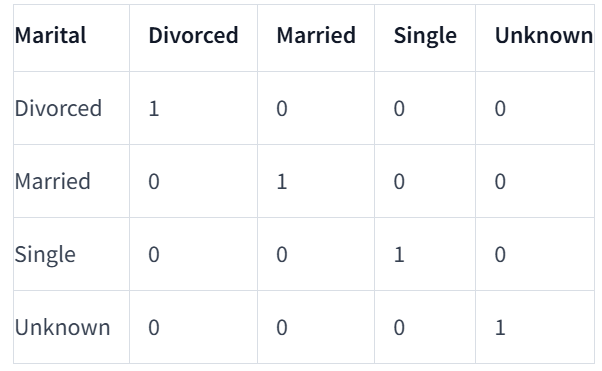

Each row above represents an observation. The Marital column lists the category for each observation. The rest of the columns store a 0 or 1, depending on the category for that observation.

This process is known as one-hot encoding. The new columns that get created in this process are called dummy variables.

There are two ways we can implement one-hot encoding. We discussed the first way above. The second way is to drop the first category encountered when performing one-hot encoding instead of creating a dummy variable for it. This is possible because we can encode n categories of a categorical column with just n-1 dummy variables. Using this approach, any observation with a 0 for each dummy variable indicates that the observation belongs to the category that's been dropped. For example, if Unknown is the first category encountered in the Marital column, it will be dropped and produce the following table:

Notice how the Unknown observation has a 0 value for each dummy variable created. This shows us how four categories can be encoded with just three dummy variables.

We will convert the marital categorical column in our dataset to dummy variables using the second approach.

In [164]:
banking_df_copy = banking_df.copy()
banking_df_copy = pd.get_dummies(banking_df_copy, columns=['marital'], drop_first=True, dtype=int)

## k-NN for Multiple Features

We'll now implement the k-nearest neighbor algorithm for multiple features.

The only change we need to make is to our distance calculation. As we discussed on the fourth screen, the Euclidean distance for 
n
 features is calculated as:

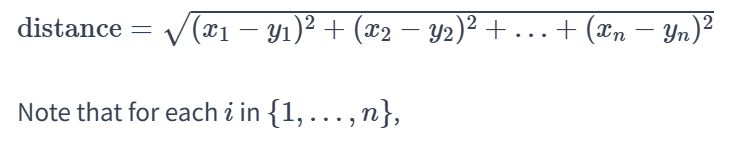

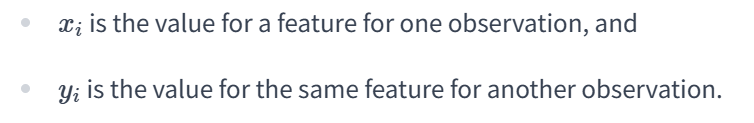

We'll modify our knn() function to account for this and select the following features for the model:

- age
- campaign
- marital_married
- marital_single

In [225]:
from sklearn.model_selection import train_test_split
X = banking_df_copy.drop('y', axis=1)
y = banking_df_copy['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=417)

In [226]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7591, 22), (2531, 22), (7591,), (2531,))

In [227]:
X_test

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,marital_single,marital_unknown
7472,38,technician,university.degree,no,yes,no,cellular,may,tue,118,...,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,1,0,0
3408,55,retired,high.school,no,yes,yes,cellular,jul,tue,394,...,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,1,0,0
5851,29,technician,university.degree,no,no,yes,cellular,apr,mon,222,...,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,1,0
9132,80,retired,basic.4y,no,yes,yes,cellular,apr,wed,654,...,0,nonexistent,-1.8,93.749,-34.6,0.642,5008.7,0,0,0
3790,45,blue-collar,basic.4y,no,no,no,cellular,aug,fri,507,...,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,32,admin.,university.degree,no,yes,yes,cellular,may,thu,195,...,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0,1,0
8588,34,admin.,university.degree,no,no,no,cellular,oct,thu,401,...,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,1,0,0
5614,32,unemployed,university.degree,no,no,no,cellular,apr,wed,110,...,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,0,1,0
8205,87,retired,basic.4y,no,no,no,cellular,aug,fri,273,...,0,nonexistent,-2.9,92.201,-31.4,0.849,5076.2,0,0,0


In [234]:
def knn(features, single_test_input, k):
    X_train['distance'] = sum([(X_train[feature] - single_test_input[feature]) ** 2 for feature in features]) ** 0.5
    # prediction = y_train[X_train['distance'].nsmallest(n=k).index].mean() for regression
    prediction = y_train[X_train['distance'].nsmallest(n=k).index].mode()[0] # for classification
    return prediction

In [235]:
sum([2, 3])

5

In [236]:
features = ['age', 'campaign', 'marital_married', 'marital_single']

In [237]:
y_preds = X_test.head().apply(lambda x: knn(features, x, k=3), axis=1)

In [238]:
y_preds

7472    1
3408    0
5851    1
9132    1
3790    1
dtype: int64

In [239]:
y_test.head()

7472    0
3408    0
5851    0
9132    1
3790    1
Name: y, dtype: int64

In [240]:
knn(features, X_test.iloc[417], k=3)

0

In [242]:
y_test.iloc[417]

0

In [243]:
X_test['predicted_y'] = X_test.apply(lambda x: knn(features, x, k=3), axis=1)

In [244]:
(X_test['predicted_y'] == y_test).value_counts(normalize=True)[True] * 100

55.59067562228368

In [246]:
def knn(features, single_test_input, k):
    squared_distance = 0
    for feature in features:
        squared_distance += (X_train[feature] - single_test_input[feature])**2
    X_train["distance"] = squared_distance**0.5
    
    prediction = y_train[X_train["distance"].nsmallest(n=k).index].mode()[0]
    return prediction

model_prediction = knn(["age", "campaign", "marital_married", "marital_single"], X_test.iloc[417], 3)
print(f"Predicted label: {model_prediction}")
print(f"Actual label: {y_test.iloc[417]}")

X_test["predicted_y"] = X_test.apply(lambda x: knn(["age", "campaign", "marital_married", "marital_single"], x, 3), axis=1)

model_accuracy = (X_test["predicted_y"] == y_test).value_counts(normalize=True)[True]*100
print(f"Accuracy of the model: {model_accuracy:.2f}%")

Predicted label: 0
Actual label: 0
Accuracy of the model: 55.59%


## Feature Engineering II

On the previous screen, we calculated the distance between multiple features. Let's look at how the distance column we created is distributed in two different situations.

If we only used the features age and campaign, the distance column, when calculated using a single data point, would have the following distribution:

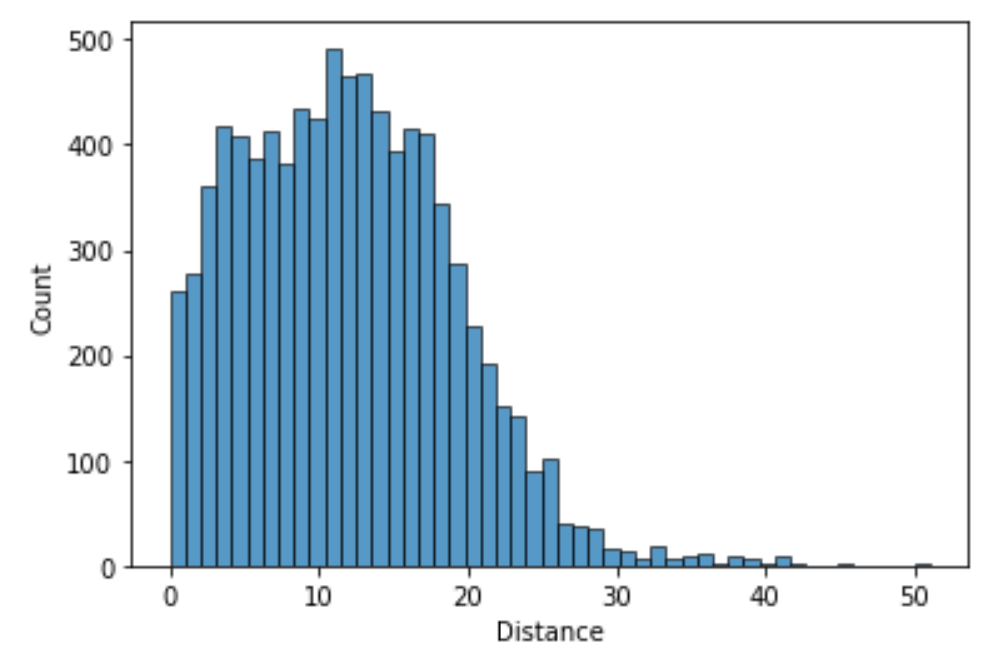

Now, what if we used age and nr.employed?

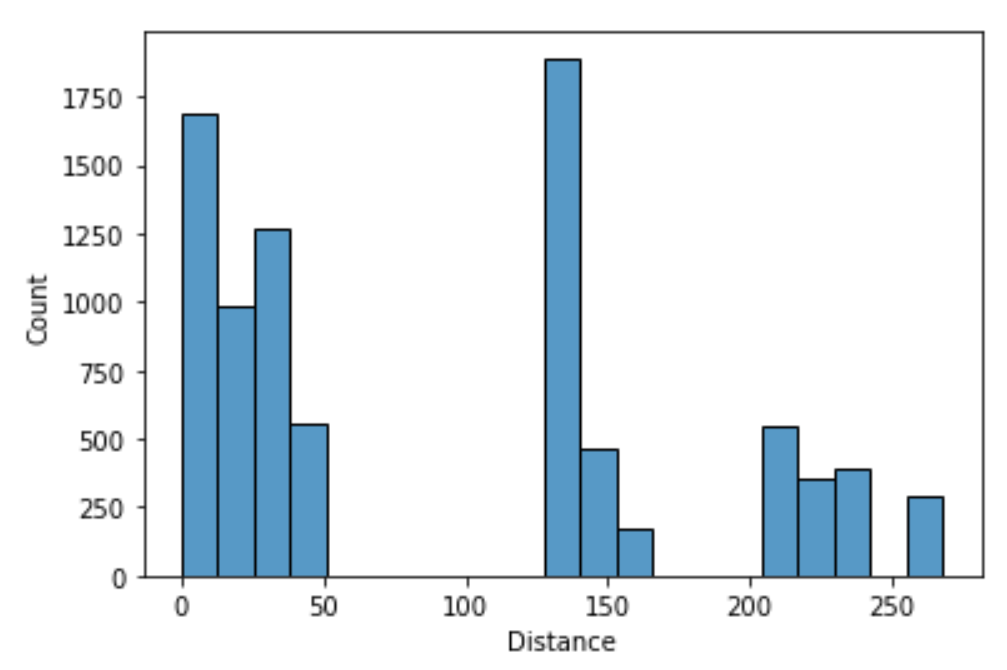

The distance calculated using age and nr.employed has a lot of variation in its values. There are distance values in the range 125 to 160 and also in the range 200 to 280. In contrast, most of the distance values for age and campaign are between 0 and 20.

If we go back to our summary statistics, we notice that the maximum value in nr.employed is 5228, while the maximum of age is only 98. Any distance calculated using the two will result in a large value because of nr.employed.

That wouldn't yield a fair estimate of the similarity between two observations. Especially when we add more features into the mix. One feature will continue to have a larger contribution to the distance calculation, and that could negatively impact our model's performance.

In order to address this, we can normalize our features by rescaling their values to a specific range. One common approach is to normalize the features to the range [0, 1]; this is called min-max scaling or min-max normalization.

We can scale our features using the following formula:

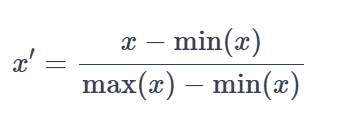

Where 
x
 is the original value of the feature.

It's crucial to remember that when you scale the features in your training dataset, you need to save these parameters (min(x) and max(x) in this case). 

The reason is that we need to apply the same scaling to our test dataset as well. We must use the summary statistics from the training data to scale the test data.

This ensures that the model sees the test data on the same scale as the training data, allowing for consistent interpretation and performance.

In this final exercise, we'll normalize our age and campaign features using the min and max values from our training data and implement the algorithm using the same features as before.

Note that the distance values calculated using age and campaign do not vary drastically. Even with normalization, our model might not show a significant improvement. However, this standard practice of scaling ensures that our model's performance remains consistent across both training and test sets.

Using the formula discussed above, normalize age and campaign so their values are between 0 and 1.

- Make sure to normalize the columns in the training set as well as the test set using the same summary statistics values from the training set.

Replace the age and campaign columns with their normalized versions.

In [263]:
features = ["age", "campaign"]

for feature in features:
    min_value = X_train[feature].min()
    max_value = X_train[feature].max()
    X_train[feature] = (X_train[feature] - min_value) / (max_value - min_value)
    X_test[feature] = (X_test[feature] - min_value) / (max_value - min_value)

In [265]:
features = ['age', 'campaign', 'marital_married', 'marital_single']

In [266]:
X_test['predicted_y'] = X_test.apply(lambda x: knn(features, x, k=3), axis=1)

In [267]:
(X_test['predicted_y'] == y_test).value_counts(normalize=True)[True] * 100

55.472145397076254

In [268]:
def knn(features, test_input, k):
    distance = 0
    for feature in features:
        distance += (X_train[feature] - test_input[feature])**2
    X_train["distance"] = (distance)**0.5
    
    prediction = y_train[X_train["distance"].nsmallest(n=k).index].mode()[0]
    return prediction


features = ["age", "campaign"]

for feature in features:
    min_value = X_train[feature].min()
    max_value = X_train[feature].max()
    X_train[feature] = (X_train[feature] - min_value) / (max_value - min_value)
    X_test[feature] = (X_test[feature] - min_value) / (max_value - min_value)

X_test["predicted_y"] = X_test.apply(lambda x: knn(["age", "campaign", "marital_married", "marital_single"], x, 3), axis=1)

model_accuracy = (X_test["predicted_y"] == y_test).value_counts(normalize=True)[True]*100
print(f"Accuracy of the model: {model_accuracy:.2f}%")

Accuracy of the model: 55.47%


As we suspected, our model's performance didn't improve very much. In fact, our model's accuracy dipped just a little, from 55.47% to 55.14%. If we were to randomly guess a particular data point's class, we would be correct 50% of the time since there are only two classes. So our model is only performing slightly better than a random guess right now.

However, this is not a cause for concern. In future lessons, we'll learn how we can improve our model. It's important to bear in mind that building, training, and fine-tuning machine learning models is an iterative process.

In this lesson, we learned:

- What the K-Nearest Neighbors algorithm is.
- How to implement it from scratch, both using a single feature and using multiple features.
- About feature engineering, specifically:
    - Encoding our categorical variables into numerical values, and
    - Normalizing our features using min-max scaling.

In the next lesson, we'll learn more about evaluating our models.

## Evaluating Model Performance

In the previous lesson, we implemented the K-Nearest Neighbors algorithm and trained a classifier to predict if a bank client would subscribe to the bank's product.

In this lesson, we'll build and train the classifier using scikit-learn and try to improve upon our previous model's performance.

We'll use the same dataset as last time. The [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing) consists of the following columns:

- age: (numeric)
- job: type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- y: has the client subscribed a term deposit? (binary: 'yes','no')

## Validation Set

We learned in the previous lesson that our data set doesn't contain any missing values. We don't currently need to wrangle our data any further. We can move on to preparing it for training our model by splitting it into training and test sets.

Our goal with training our model is to see how well it can perform on the test set or on unseen data. However, if we repeatedly evaluate the model on the test set and re-train it, we are introducing bias.

Our model will start to indirectly learn from our test set.

In this situation, we won't be able to effectively judge how well our model performs on data it hasn't seen before.

That's why we need a buffer between our training and test sets. We want to evaluate our model and improve upon it without having to use the test set.

We'll create a `validation set`, sometimes referred to as a `development set` or `dev set`.

We can then train our model and evaluate it on the validation set. Depending on its performance on the validation set, we can re-train it with some tweaks and evaluate it again.

Once we're satisfied with the model's performance on the validation set, we can evaluate it one last time on the test set.

We'll split that data set into three parts:

1. Training Set (60%)
2. Validation Set (20%)
3. Test Set (20%)

We'll use scikit-learn's [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data set twice.

In [319]:
X = banking_df.drop('y', axis=1)
y = banking_df['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2 * X.shape[0]/X_train.shape[0], random_state=417)


## Building and Training a k-NN

Now that we have our training set, we can build a classifier and fit the model to the data.

We learned in the first lesson that fitting a model is the same as training the model. The model learns from the data. However, when we implemented our model from scratch in the previous lesson, we learned that k-NNs don't really have a training phase.

So how would we use scikit-learn to "fit" our model?

When we implemented a k-NN from scratch, we calculated the distance between observations. Across a large number of features and observations, this can be a computationally expensive task. Instead of a brute force approach, we can use different data structures to help speed that up.

scikit-learn uses the training phase to set up such a data structure. For different algorithms, scikit-learn handles the training phase differently. This again brings up the point of experimenting without understanding an algorithm's inner workings. We wouldn't have learned about this distinction if we hadn't implemented a k-NN from scratch!

Let's build our model!

In [274]:
from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(n_neighbors=3)
# model.fit(X_train, y_train)

## Feature Engineering

Calling fit() on our training data produced an error on the previous screen.

This is because we have categorical columns in our dataset that haven't yet been converted into dummy variables. Since a k-NN uses a distance metric, it can't work with string data.

We will next:

1. Convert all our categorical columns into dummy variables.
2. Normalize the features by scaling their values to the range [0, 1].

n the previous lesson, we implemented the normalization from scratch. Now we'll use scikit-learn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method.

 From a functional perspective, it works similar to the way we'd instantiate a model in scikit-learn and then call fit() on the data.

However, fitting to the data is just the first step. sklearn.preprocessing.MinMaxScaler.fit() calculates the minimum and maximum values for each feature we input.

We then need to transform those features, using sklearn.preprocessing.MinMaxScaler.transform() to normalize those features.

scikit-learn provides us with a single function, sklearn.preprocessing.MinMaxScaler.fit_transform(), that allows us to carry out both operations.

In [284]:
banking_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
10118,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
10119,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
10120,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [323]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.get_dummies(X_train[['age', 'campaign', 'marital', 'education']], columns=['marital', 'education'], drop_first=True, dtype=int)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.27777778, 0.02439024, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55555556, 0.02439024, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98611111, 0.02439024, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43055556, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16666667, 0.12195122, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.375     , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [305]:
scaler.get_feature_names_out()

array(['age', 'campaign', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown'], dtype=object)

In [306]:
pd.DataFrame(encoder.fit_transform(train), columns=scaler.get_feature_names_out())

,age,campaign,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,0.277778,0.024390,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.555556,0.024390,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.986111,0.024390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263889,0.121951,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.097222,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6067,0.236111,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6068,0.333333,0.024390,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6069,0.430556,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6070,0.166667,0.121951,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [307]:
# from sklearn.preprocessing import MinMaxScaler

# X_train = pd.get_dummies(data = X_train, columns = ["marital", "default"], drop_first = True)

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])

## Evaluating the Model on Validation Set

We can now build and train our model again. On this screen, we'll also evaluate our model on our validation set.

Since we transformed some of the features in our training data in the previous screen, we need to make sure we transform those same features in our validation set.

We don't need to use sklearn.preprocessing.MinMaxScaler.fit() again. Our scaler has already "learned" how to scale the training data and we can directly transform our validation (or test) data set using the already-defined scaler.

In [320]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

X_val = pd.get_dummies(X_val[['age', 'campaign', 'marital', 'education']], columns=['marital', 'education'], drop_first=True, dtype=int)


In [329]:
X_val_scaled = scaler.transform(X_val)
pd.DataFrame(X_val_scaled, columns=scaler.get_feature_names_out())

,age,campaign,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,0.291667,0.024390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.527778,0.048780,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.166667,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.875000,0.024390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.388889,0.024390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.263889,0.024390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2021,0.500000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2022,0.333333,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023,0.291667,0.121951,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [330]:
X_val_scaled

array([[0.29166667, 0.02439024, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.52777778, 0.04878049, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29166667, 0.12195122, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.29166667, 0.02439024, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [331]:
knn.score(X_val_scaled, y_val)

0.5397530864197531

In [333]:
knn = KNeighborsClassifier(n_neighbors=2000)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2000)

In [335]:
knn.score(X_val_scaled, y_val)

0.5674074074074074

In [347]:
values = range(1, 200)
accuracies = []
best_k = None
best_acc = None
for k in values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_val_scaled, y_val)
    accuracies.append(acc)
    if best_acc is None or acc > best_acc:
        best_acc = acc
        best_k = k
    

In [351]:
best_k, best_acc

(100, 0.6148148148148148)

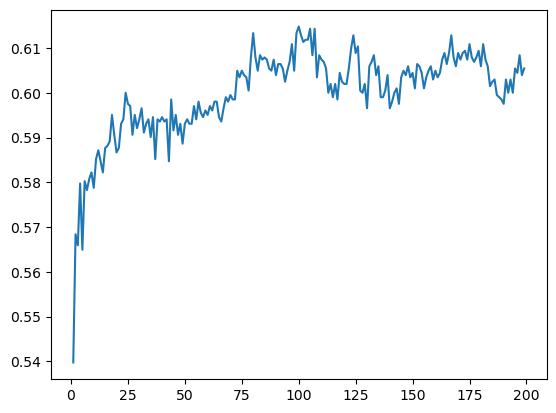

In [350]:
plt.plot(values, accuracies)
plt.show()

In [352]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# banking_df = pd.read_csv("subscription_prediction.csv")
X = banking_df.drop(["y"], axis=1)
y = banking_df["y"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state = 417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*X.shape[0]/X_train.shape[0], random_state = 417)

X_train = pd.get_dummies(data = X_train, columns = ["marital", "default"], drop_first = True)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])


knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled, y_train)

X_val = pd.get_dummies(data = X_val, columns = ["marital", "default"], drop_first = True)

X_val_scaled = scaler.transform(X_val[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])

val_accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy of model evaluated on validation set with K = 1: {val_accuracy*100:.2f}%")

knn = KNeighborsClassifier(n_neighbors = 2000)
knn.fit(X_train_scaled, y_train)

val_accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy of model evaluated on validation set with K = 2000: {val_accuracy*100:.2f}%")

Accuracy of model evaluated on validation set with K = 1: 69.19%
Accuracy of model evaluated on validation set with K = 2000: 59.46%


## Underfitting and Overfitting

In the previous screen, selecting two drastically different values for 
K
 results in different model accuracies. One performs much better than the other.

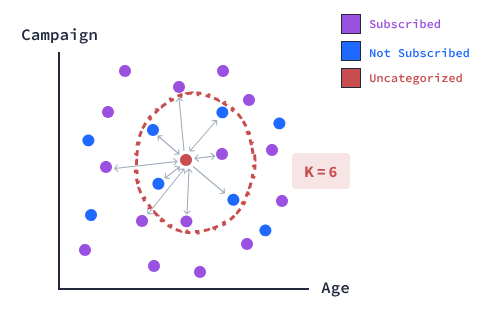

This difference in performance highlights a crucial concept in machine learning: the balance between underfitting and overfitting. In machine learning, our goal is to create models that generalize well to new, unseen data. However, finding the right balance can be challenging, and two common issues that can arise are underfitting and overfitting.

Let's explore these concepts using the K-Nearest Neighbors (KNN) algorithm, focusing on how different values of 
K
 can lead to these issues:

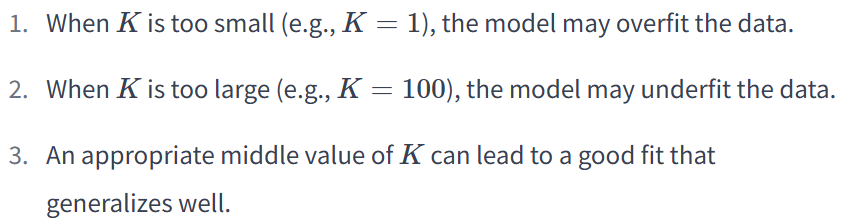

In [353]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    return train_accuracy, test_accuracy

# Evaluate models with different k values
k_1 = evaluate_model(1)
k_5 = evaluate_model(5)
k_100 = evaluate_model(100)

print(f"K=1: Train Accuracy: {k_1[0]:.4f}, Test Accuracy: {k_1[1]:.4f}")
print(f"K=5: Train Accuracy: {k_5[0]:.4f}, Test Accuracy: {k_5[1]:.4f}")
print(f"K=100: Train Accuracy: {k_100[0]:.4f}, Test Accuracy: {k_100[1]:.4f}")

K=1: Train Accuracy: 1.0000, Test Accuracy: 0.9000
K=5: Train Accuracy: 0.9313, Test Accuracy: 0.9350
K=100: Train Accuracy: 0.8750, Test Accuracy: 0.9100


This code demonstrates how different values of K affect the model's performance:

1. Overfitting (K=1): Train Accuracy: 1.0000, Test Accuracy: 0.9000
    - The model has a perfect score on the training data (1.0000) but a lower score on the test data (0.9000).
    - This indicates overfitting: the model has memorized the training data perfectly but doesn't generalize as well to new data.

2. Good Fit (K=5): Train Accuracy: 0.9313, Test Accuracy: 0.9350
    - The model performs similarly on both training and test data, with the test accuracy even slightly higher.
    - This suggests a good balance: the model generalizes well to new data.

3. Slight Underfitting (K=100):Train Accuracy: 0.8750, Test Accuracy: 0.9100
    - Both accuracies are lower than K=5, indicating the model might be too simple.
    - Interestingly, the test accuracy is higher than the training accuracy, which can happen with high K values as the model becomes very generalized.

Visual representation of decision boundaries:

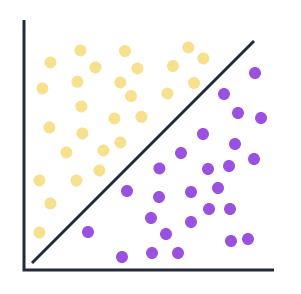

Good Fit: Balanced decision boundary

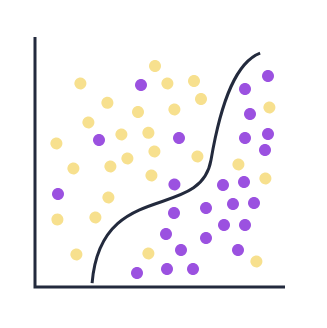

Overfitting: Overly complex decision boundary



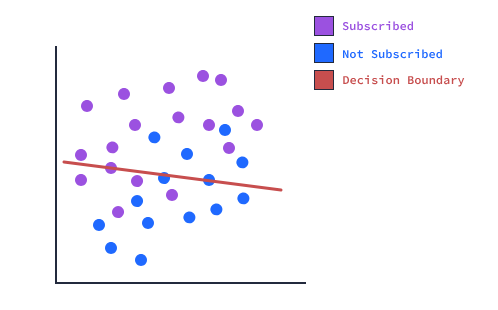

Underfitting: Overly simple decision boundary

In practice, we aim to find the optimal K value that balances between overfitting and underfitting, resulting in a model that generalizes well to new data. This process often involves techniques like cross-validation, which we'll explore in future lessons.

## Evaluating the Model on Test Set

Let's evaluate our model on the test set.

1. Experiment with different features and values for 
K
.

    - 1.1. Evaluate the model's performance on the validation set for the different combinations.

    - 1.2. Identify features and values for 
K
 that result in a reasonably good (to you) accuracy value.

2. Using the features and values for 
K
 identified in the previous step, evaluate the model on the test set.

    - 2.1. Normalize the test set before evaluating the model.

    - 2.2. The model should be evaluated on the test set only once.



In [358]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# banking_df = pd.read_csv("subscription_prediction.csv")
X = banking_df.drop(["y"], axis=1)
y = banking_df["y"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state = 417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*X.shape[0]/X_train.shape[0], random_state = 417)

X_train = pd.get_dummies(data = X_train, columns = ["marital", "default"], drop_first = True)
X_val = pd.get_dummies(data = X_val, columns = ["marital", "default"], drop_first = True)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])

X_val_scaled = scaler.transform(X_val[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])
print(0, 1, sep="\n")


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

train_accuracy = knn.score(X_train_scaled, y_train)
print(f"Accuracy of model evaluated on training set with K = 5: {train_accuracy*100:.2f}%")

val_accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy of model evaluated on validation set with K = 5: {val_accuracy*100:.2f}%")

X_test = pd.get_dummies(data = X_test, columns = ["marital", "default"], drop_first = True)

X_test_scaled = scaler.transform(X_test[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])

test_accuracy = knn.score(X_test_scaled, y_test)
print(f"Accuracy of model evaluated on test set with K = 5: {test_accuracy*100:.2f}%")

0
1
Accuracy of model evaluated on training set with K = 5: 82.23%
Accuracy of model evaluated on validation set with K = 5: 74.81%
Accuracy of model evaluated on test set with K = 5: 75.51%


## Review
In this lesson, we learned:

- How to build and train the K-Nearest Neighbors algorithm using scikit-learn.
- What a validation set is used for.
- What overfitting and underfitting are.

In the next lesson, we will learn more about improving our model's performance.

## Hyperparameter Optimization

We previously built and trained a K-Nearest Neighbors classifier using scikit-learn. We also learned about the importance of a validation set.

Now we'll learn how to improve a machine learning model's performance.

We'll use the same dataset as last time. The [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing) consists of the following columns:

- age: (numeric)
- job: type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric).
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days passed after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- y: has the client subscribed a term deposit? (binary: 'yes','no')

In [373]:
banking_df = pd.read_csv('../../Datasets/subscription_prediction.csv')
banking_df['y'] = banking_df['y'].apply(lambda x: 1 if x == 'yes' else 0)


banking_df = pd.get_dummies(data = banking_df, drop_first = True)


## Feature Selection

We previously either used all the features in our dataset to build and train a model or randomly selected a handful of them.

While both can be appropriate approaches to train a model, they aren't necessarily the best ones. We've already observed how our models didn't always perform as well as we'd hoped in either of those scenarios.

Not all features in a dataset might be relevant to a model's performance. Identifying and removing such features in the data preparation step, before training a model, can not only boost its performance, but also reduce the computational cost. The latter is especially important when we have to work with large datasets and complex machine learning models.

There are several ways we can identify and select relevant features:



- Random selection.
    - We've utilized this in the previous lesson by selecting features at random.

- Domain Expertise.
    - For example, one of the features is euribor3m. A reasonable understanding of what Euribor is could inform of us whether it is likely to have any impact on the prediction.

- Identifying features that are strongly correlated to our target variable.

We'll learn about other approaches later. For now, we'll calculate the Pearson Correlation Coefficient on our columns to identify which features are strongly correlated to the target variable.

We could also plot the heat map for those values to make it easier to identify those features. Since the categorical columns of our dataset have been one-hot encoded, we have over fifty features in our dataset right now. Creating a heat map using all those pairs will make it difficult to identify correlations.

Instead, we'll select five features based on the highest absolute values of Pearson's r.

In [384]:
correlations = banking_df.corr()
five_features = correlations['y'].sort_values(key=abs, ascending=False)[1:6].index
X = banking_df[five_features]
y = banking_df['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2 *X.shape[0]/X_train.shape[0], random_state=417)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [396]:
correlations['y'].sort_values(key=abs, ascending=False)[1:6]

nr.employed    -0.468524
duration        0.468197
euribor3m      -0.445328
emp.var.rate   -0.429680
pdays          -0.317997
Name: y, dtype: float64

In [398]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [410]:
correlations = abs(banking_df.corr())

# Identify top 5 features, excluding y itself, that correlate strongly with y.
top_5_features = correlations["y"].sort_values(ascending=False)[1:6].index

print(correlations["y"].sort_values(ascending=False)[1:15])


nr.employed             0.468524
duration                0.468197
euribor3m               0.445328
emp.var.rate            0.429680
pdays                   0.317997
poutcome_success        0.307181
previous                0.263903
poutcome_nonexistent    0.258487
contact_telephone       0.253479
cons.price.idx          0.202009
month_may               0.185177
default_unknown         0.172503
month_oct               0.157058
month_mar               0.147276
Name: y, dtype: float64


In [401]:
X = banking_df.copy()
y = X.pop("y")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int


In [405]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:10]  # show a few features with their MI scores

duration                0.181800
euribor3m               0.168926
cons.conf.idx           0.149626
cons.price.idx          0.142482
nr.employed             0.137542
emp.var.rate            0.121678
pdays                   0.066146
poutcome_success        0.062480
previous                0.050071
poutcome_nonexistent    0.035285
Name: MI Scores, dtype: float64

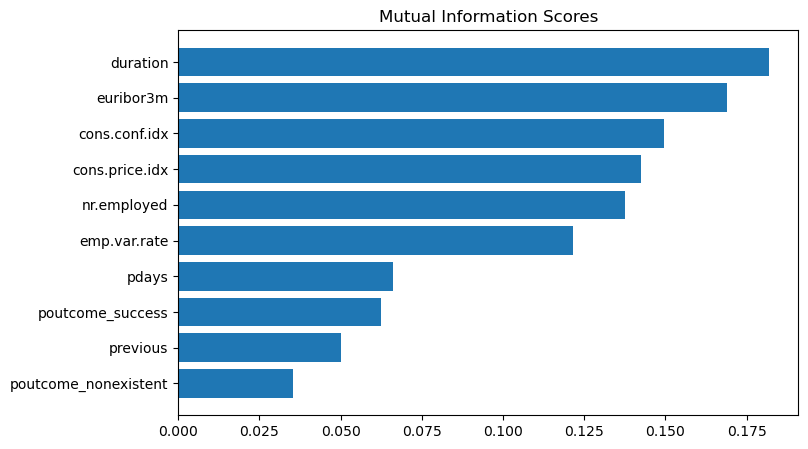

In [406]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores[:10])

## Training and Evaluating the Model

We previously selected some features based on how strongly they correlated to the target variable. It's important to note that calculating the Pearson's r is not an ideal approach.

It's a measure of linear correlation between variables. Therefore, it will fail to capture any non-linear relationships. Additionally, the dummy variables aren't technically continuous. 

There are alternative approaches (such as [Cramér's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)) that are more suitable than Pearson's correlation coefficient when working with categorical columns. We won't discuss that here, however.

Let's train our model and then evaluate it on the validation set. We'll try multiple values for 
K
 when evaluating our model.